In [29]:
import pandas as pd
import numpy as np
data = pd.read_excel("hour.xlsx")
y = data['season']
X = data[['temp', 'cnt']]

In [30]:
print('Class labels: ', np.unique(y))

Class labels:  [1 2 3 4]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size = 0.3, random_state = 1, stratify = y)

In [32]:
print('Labels counts in y: ', np.bincount(y)[1:])
print('Labels counts in y_train: ', np.bincount(y_train)[1:])
print('Labels counts in y_test: ', np.bincount(y_test)[1:])

Labels counts in y:  [4242 4409 4496 4232]
Labels counts in y_train:  [2969 3086 3147 2963]
Labels counts in y_test:  [1273 1323 1349 1269]


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [34]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [35]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 2724


In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.478


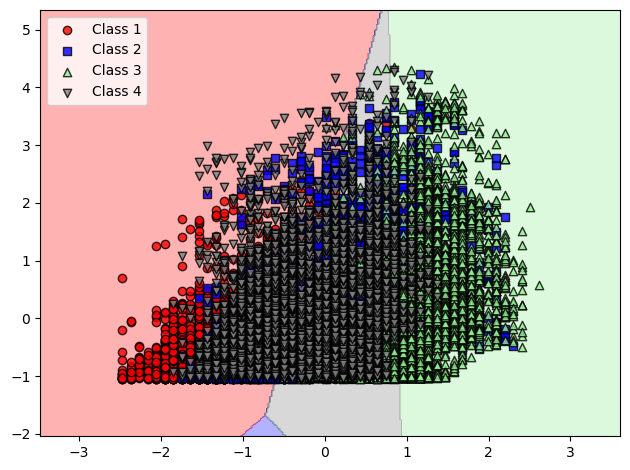

In [37]:
from plot_decision_region import plot_decision_regions
import matplotlib.pyplot as plt

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std,
                      y = y_combined,
                      classifier = ppn,
                      test_idx = range(105, 150))
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

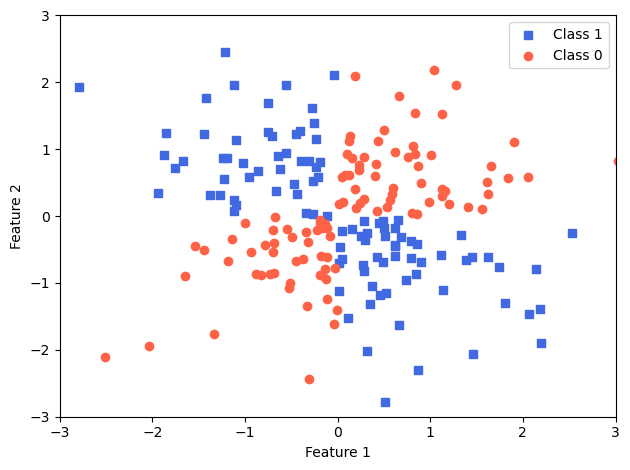

In [38]:
import matplotlib.pyplot as plt
import numpy as np
np. random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1], c = 'royalblue', marker = 's',
            label = 'Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1], c = 'tomato', marker = 'o',
            label = 'Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()